In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')
df.head()
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#df.sort_values(['PassengerId'], ascending=[1,0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

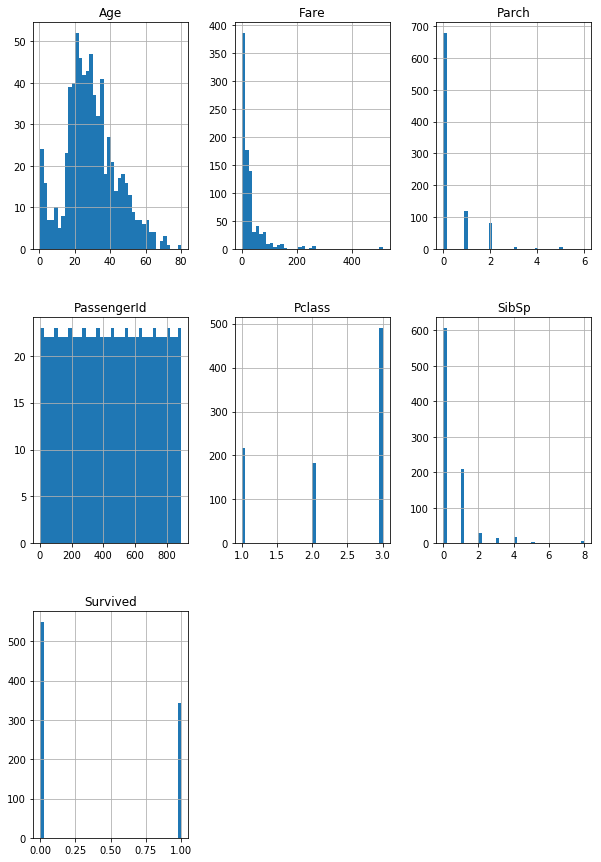

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=40,figsize=(10,15))
plt.show()

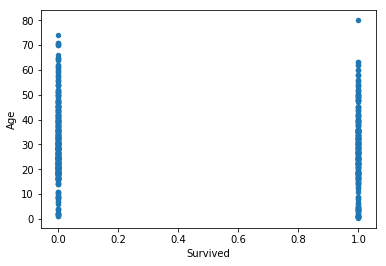

In [8]:
df.plot(kind="scatter", x="Survived", y="Age")

In [9]:
corr_matrix = df.corr()

In [10]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

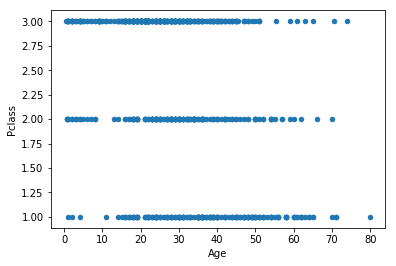

In [11]:
# From the covariance matrix we can see that the fare class, then having parents and children 
# makes it more likely to survive.
# age has negative correlation.. Being older less likely to survive
# Pclass high negative correlation.
df.plot(kind="scatter", x="Age", y="Pclass")


In [12]:
import sklearn

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [16]:
#cat_attribs = ["PassengerId"]
#cat_pipeline = Pipeline(['selector', DataFrameSelector(cat_attribs), 
#                         ('cat_encoder', OneHotEncoder(sparse=False))])

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import Imputer

In [18]:
#create feature union

In [19]:
#create pipeline

In [20]:
#evaluate pipeline
y = df.iloc[:,1].values
X = df.iloc[:,[2,5,6,7,9]].values
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer.fit(X[:,[0, 1, 2, 3, 4]])

X[:,[1]] = imputer.fit_transform(X[:,[1]],y)
print(X)

[[ 3.         22.          1.          0.          7.25      ]
 [ 1.         38.          1.          0.         71.2833    ]
 [ 3.         26.          0.          0.          7.925     ]
 ...
 [ 3.         29.69911765  1.          2.         23.45      ]
 [ 1.         26.          0.          0.         30.        ]
 [ 3.         32.          0.          0.          7.75      ]]


In [22]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=2)))
feature_union = FeatureUnion(features)
#pipeline = Pipeline(feature_union)
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

In [23]:
print(X)
print(y)
seed = 5
kfold = KFold(n_splits=25, random_state=seed)

[[ 3.         22.          1.          0.          7.25      ]
 [ 1.         38.          1.          0.         71.2833    ]
 [ 3.         26.          0.          0.          7.925     ]
 ...
 [ 3.         29.69911765  1.          2.         23.45      ]
 [ 1.         26.          0.          0.         30.        ]
 [ 3.         32.          0.          0.          7.75      ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1

In [24]:
results = cross_val_score(model, X, y, cv=kfold)

C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [25]:
print(results.mean())

0.7018730158730159


In [26]:
final_model = model

In [27]:
dfTest = pd.read_csv('test.csv')
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
X_test = dfTest.iloc[:,[1,4,5,6,8]].values

In [29]:
imputer.fit(X_test[:,[1,4]])
X_test[:,[1,4]] = imputer.transform(X_test[:,[1,4]])
print(X_test)

[[ 3.         34.5         0.          0.          7.8292    ]
 [ 3.         47.          1.          0.          7.        ]
 [ 2.         62.          0.          0.          9.6875    ]
 ...
 [ 3.         38.5         0.          0.          7.25      ]
 [ 3.         30.27259036  0.          0.          8.05      ]
 [ 3.         30.27259036  1.          1.         22.3583    ]]


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [31]:
num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")),
        ("pca", PCA(n_components=4)),
    ])

In [32]:
num_pipeline.fit_transform(df)

array([[-25.14429959,  -6.68759933,   0.2278058 ,  -0.5165708 ],
       [ 39.29916306,   7.57054149,   0.28103692,  -0.59542324],
       [-24.36441927,  -2.68701181,  -0.58766012,  -0.09499454],
       ...,
       [ -8.78054099,  -1.15411493,   1.11671988,   1.28836322],
       [ -2.29783275,  -3.28379521,  -0.70464717,  -0.13433769],
       [-24.37638967,   3.31368413,  -0.43951622,  -0.08145607]])

In [33]:
## create string categorical column imputer


In [34]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [36]:
cat_pipeline.fit_transform(df)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [37]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [38]:
X_train = preprocess_pipeline.fit_transform(df)

In [39]:
X_train

array([[-25.14429959,  -6.68759933,   0.2278058 , ...,   0.        ,
          0.        ,   1.        ],
       [ 39.29916306,   7.57054149,   0.28103692, ...,   1.        ,
          0.        ,   0.        ],
       [-24.36441927,  -2.68701181,  -0.58766012, ...,   0.        ,
          0.        ,   1.        ],
       ...,
       [ -8.78054099,  -1.15411493,   1.11671988, ...,   0.        ,
          0.        ,   1.        ],
       [ -2.29783275,  -3.28379521,  -0.70464717, ...,   1.        ,
          0.        ,   0.        ],
       [-24.37638967,   3.31368413,  -0.43951622, ...,   0.        ,
          1.        ,   0.        ]])

In [40]:
y_train = df["Survived"]

In [41]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
dfTest = pd.read_csv('test.csv')

In [43]:
X_test = preprocess_pipeline.transform(dfTest)

In [44]:
#y_pred = svm_clf.predict(X_test)

In [45]:
#svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=kfold)
#svm_scores.mean()

In [46]:
## try a different model!
dfTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=kfold)
forest_clf.fit(X_train, y_train)
ypred = forest_clf.predict(X_test)
ypred.size
ypred

In [48]:
plt.figure(figsize=(8,4))
plt.plot([1]*25, svm_scores, ".")
plt.plot([2]*25, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

NameError: name 'svm_scores' is not defined

<Figure size 576x288 with 0 Axes>

In [49]:
labels = dfTest.iloc[:,0].values
labels.size
labels

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [62]:
ypred1 = np.vstack((labels, ypred))
ypred1 = np.transpose(ypred1)
#y_pred.savetxt("titatnic",y_pred,delimiter=",")
pd.DataFrame(ypred1).to_csv("Titanic.csv")